# What are Recurrent Neural Networks (RNN)
A recurrent neural network (RNN) is the type of artificial neural network (ANN) that is used in Apple’s Siri and Google’s voice search. RNN remembers past inputs due to an internal memory which is useful for predicting stock prices, generating text, transcriptions, and machine translation.

In the traditional neural network, the inputs and the outputs are independent of each other, whereas the output in RNN is dependent on prior elementals within the sequence. Recurrent networks also share parameters across each layer of the network. In feedforward networks, there are different weights across each node. Whereas RNN shares the same weights within each layer of the network and during gradient descent, the weights and basis are adjusted individually to reduce the loss.

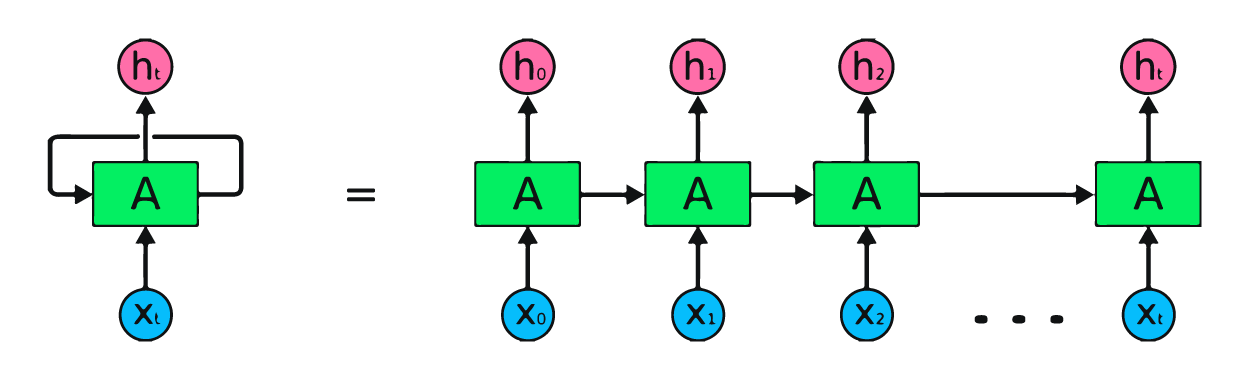


The image above is a simple representation of recurrent neural networks. If we are forecasting stock prices using simple data [45,56,45,49,50,…], each input from X0 to Xt will contain a past value. For example, X0 will have 45, X1 will have 56, and these values are used to predict the next number in a sequence.

# How Recurrent Neural Networks Work
In RNN, the information cycles through the loop, so the output is determined by the current input and previously received inputs.

The input layer X processes the initial input and passes it to the middle layer A. The middle layer consists of multiple hidden layers, each with its activation functions, weights, and biases. These parameters are standardized across the hidden layer so that instead of creating multiple hidden layers, it will create one and loop it over.

Instead of using traditional backpropagation, recurrent neural networks use backpropagation through time (BPTT) algorithms to determine the gradient. In backpropagation, the model adjusts the parameter by calculating errors from the output to the input layer. BPTT sums the error at each time step as RNN shares parameters across each layer. 



In [ ]:
import os
os.getcwd

# Types of Recurrent Neural Networks
Feedforward networks have single input and output, while recurrent neural networks are flexible as the length of inputs and outputs can be changed. This flexibility allows RNNs to generate music, sentiment classification, and machine translation.

There are four types of RNN based on different lengths of inputs and outputs.

1. One-to-one is a simple neural network. It is commonly used for machine learning problems that have a single input and output.
2. One-to-many has a single input and multiple outputs. This is used for generating image captions.
3. Many-to-one takes a sequence of multiple inputs and predicts a single output. It is popular in sentiment classification, where the input is text and the output is a category.
4. Many-to-many takes multiple inputs and outputs. The most common application is machine translation.

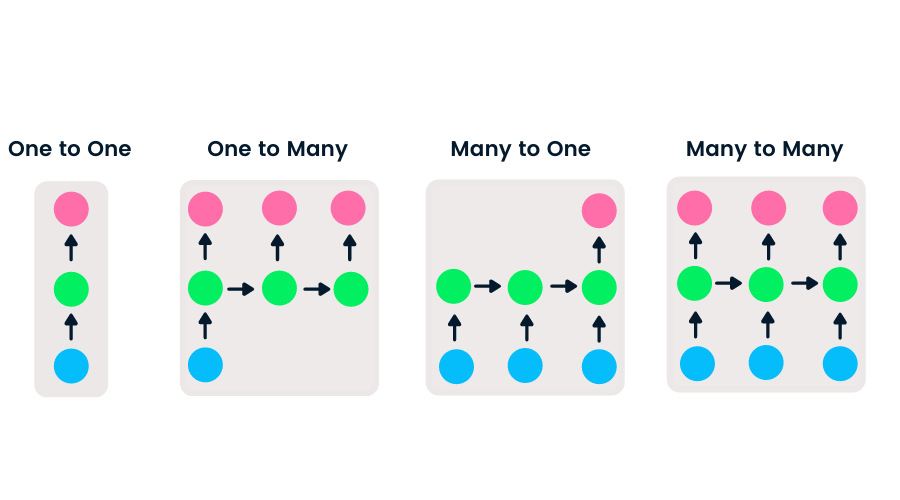

# CNN vs. RNN
The convolutional neural network (CNN) is a feed-forward neural network capable of processing spatial data. It is commonly used for computer vision applications such as image classification. The simple neural networks are good at simple binary classifications, but they can't handle images with pixel dependencies. The CNN model architecture consists of convolutional layers, ReLU layers, pooling layers, and fully connected output layers. You can learn CNN by working on a project such as Convolutional Neural Networks in Python.


# CNN Model Architecture
### Key Differences Between CNN and RNN
- CNN is applicable for sparse data like images. RNN is applicable for time series and sequential data.
While training the model, CNN uses a simple backpropagation and RNN uses backpropagation through time to calculate the loss.
- RNN can have no restriction in length of inputs and outputs, but CNN has finite inputs and finite outputs.
- CNN has a feedforward network and RNN works on loops to handle sequential data.
- CNN can also be used for video and image processing. RNN is primarily used for speech and text analysis.
### Limitations of RNN
Simple RNN models usually run into two major issues. These issues are related to gradient, which is the slope of the loss function along with the error function.

- Vanishing Gradient problem occurs when the gradient becomes so small that updating parameters becomes insignificant; eventually the algorithm stops learning.
- Exploding Gradient problem occurs when the gradient becomes too large, which makes the model unstable. In this case, larger error gradients accumulate, and the model weights become too large. This issue can cause longer training times and poor model performance.

## Step 1: Generate Random Data
We'll create a simple sequence prediction problem where the RNN will try to predict the next value in a sequence of numbers.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate random data
np.random.seed(42)
data = np.random.rand(1000, 10)  # 1000 sequences, each of length 10
labels = np.random.rand(1000)    # 1000 target values

# Split data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
train_labels = labels[:train_size]
test_data = data[train_size:]
test_labels = labels[train_size:]


## Step 2: Build the RNN Model
We'll create a simple RNN model using TensorFlow and Keras.

In [2]:
# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(10, 1), activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()


C:\Users\monika201103\Anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Train the Model
We'll reshape the data to match the expected input shape for the RNN, train the model, and then evaluate it.

In [3]:
# Reshape data to match RNN input shape (samples, time steps, features)
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Evaluate the model
test_loss = model.evaluate(test_data, test_labels)
print(f"Test Loss: {test_loss}")


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2171
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0878
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0877
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0857
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0828 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0838
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0803
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0858
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0827
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0823
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0910  
Test Loss: 0.087447889149189


## Step 4: Make Predictions
We'll use the trained model to make predictions on the test data.


In [4]:
# Make predictions
predictions = model.predict(test_data)

# Print predictions
print("Predictions:", predictions[:5])
print("True Values:", test_labels[:5])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Predictions: [[0.42784983]
 [0.5499666 ]
 [0.5325282 ]
 [0.53692263]
 [0.48307377]]
True Values: [0.35121702 0.83724    0.06679708 0.94234351 0.98631684]
